## Figure 1

This manuscript generates figure 1 and relavent data of the paper. 

Kexin Dong

Date created: May 24, 2024  

Last updated: Oct 20, 2025


In [4]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42   
mpl.rcParams['ps.fonttype'] = 42 
mpl.rcParams['text.usetex'] = False 
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import seaborn as sns
import pickle
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

In [2]:
# load the H2M Database result data 
df_binded = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned_v3.csv')

In [3]:
df_binded

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,ID_human,ID_mouse,Database,ID_db,pe_human,pe_mouse,be_human,be_mouse,expanded,flank_size
0,A1BG,ENSG00000121410.7,ENST00000263100.3,chr19,8,-,True,58858888,58858888,C,...,CLINVAR-H2135681,CLINVAR-H2135681-M01-V01,CLINVAR,2552144.0,False,False,False,False,False,2
1,A1BG,ENSG00000121410.7,ENST00000263100.3,chr19,8,-,True,58861808,58861808,A,...,CLINVAR-H2135684,CLINVAR-H2135684-M01-V01,CLINVAR,2650587.0,False,False,False,False,False,3
2,A1BG,ENSG00000121410.7,ENST00000263100.3,chr19,8,-,True,58861858,58861858,G,...,CLINVAR-H2135685,CLINVAR-H2135685-M01-V01,CLINVAR,2306103.0,False,False,False,False,False,3
3,A1BG,ENSG00000121410.7,ENST00000263100.3,chr19,8,-,True,58861859,58861859,C,...,CLINVAR-H2135686,CLINVAR-H2135686-M01-V01,CLINVAR,2513094.0,False,False,False,False,False,3
4,A1BG,ENSG00000121410.7,ENST00000263100.3,chr19,8,-,True,58861930,58861930,C,...,CLINVAR-H2135688,CLINVAR-H2135688-M01-V01,CLINVAR,2211717.0,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910905,ZZZ3,ENSG00000036549.8,ENST00000370801.3,chr1,11,-,True,78097611,78097611,T,...,CLINVAR-H0083124,NaN,CLINVAR,2470455.0,False,False,False,False,False,0
3910906,ZZZ3,ENSG00000036549.8,ENST00000370801.3,chr1,11,-,True,78097791,78097791,C,...,CLINVAR-H0083127,NaN,CLINVAR,2258347.0,False,False,False,False,False,0
3910907,ZZZ3,ENSG00000036549.8,ENST00000370801.3,chr1,11,-,True,78097803,78097803,T,...,CLINVAR-H0083128,NaN,CLINVAR,2600723.0,False,False,False,False,False,0
3910908,ZZZ3,ENSG00000036549.8,ENST00000370801.3,chr1,11,-,True,78098289,78098289,T,...,CLINVAR-H0083141,NaN,CLINVAR,2269111.0,False,False,False,False,False,0


## Figure 1e  
Pie chart visualizing the presence of mouse gene orthologs for human genes in the input human dataset.

In [5]:
with open('/Users/kexindong/Documents/GitHub/Output/h2m_database/gene_mapped.pkl', 'rb') as file:
    set_gene_mapped = pickle.load(file)

with open('/Users/kexindong/Documents/GitHub/Output/h2m_database/gene_unmapped.pkl', 'rb') as file:
    set_gene_unmapped = pickle.load(file)

df_for_dict = df_binded[df_binded['gene_name_h'].isin(set_gene_mapped)]
dict_of_h = dict(zip(df_for_dict['gene_name_m'], df_for_dict['gene_name_h']))
del df_for_dict

In [6]:
dict_of_h

{'A1bg': 'A1BG',
 'A1cf': 'A1CF',
 'A2m': 'A2M',
 'A3galt2': 'A3GALT2',
 'A4galt': 'A4GALT',
 'A4gnt': 'A4GNT',
 'Aaas': 'AAAS',
 'Aacs': 'AACS',
 'Aadac': 'AADAC',
 'Aadacl2': 'AADACL2',
 'Aadacl3': 'AADACL3',
 'AAdacl4fm3': 'AADACL4',
 'Aadacl4': 'AADACL4',
 'Aadacl4fm1': 'AADACL4',
 'Aadacl4fm2': 'AADACL4',
 'Aadacl4fm4': 'AADACL4',
 'Aadacl4fm5': 'AADACL4',
 'Aadat': 'AADAT',
 'Aagab': 'AAGAB',
 'Aak1': 'AAK1',
 'Aamdc': 'AAMDC',
 'Aamp': 'AAMP',
 'Aanat': 'AANAT',
 'Aar2': 'AAR2',
 'Aard': 'AARD',
 'Aarsd1': 'AARSD1',
 'Aasdh': 'AASDH',
 'Aasdhppt': 'AASDHPPT',
 'Aass': 'AASS',
 'Aatf': 'AATF',
 'Aatk': 'AATK',
 'Abat': 'ABAT',
 'Abca1': 'ABCA1',
 'Abca12': 'ABCA12',
 'Abca13': 'ABCA13',
 'Abca2': 'ABCA2',
 'Abca3': 'ABCA3',
 'Abca4': 'ABCA4',
 'Abca5': 'ABCA5',
 'Abca6': 'ABCA6',
 'Abca7': 'ABCA7',
 'Abca8a': 'ABCA8',
 'Abca8b': 'ABCA8',
 'Abca9': 'ABCA9',
 'Abcb1a': 'ABCB1',
 'Abcb1b': 'ABCB1',
 'Abcb10': 'ABCB10',
 'Abcb11': 'ABCB11',
 'Abcb4': 'ABCB4',
 'Abcb5': 'ABCB5',
 'Abc

In [7]:
# calculate the number of human genes that is one-to-multiple mapped to the mouse genome
value_counts = {}
for value in dict_of_h.values():
    if value in value_counts:
        value_counts[value] += 1
    else:
        value_counts[value] = 1

repeated_values = [value for value, count in value_counts.items() if count > 1]

print(f'human genes with multiple mouse orthologs: {repeated_values}')

human genes with multiple mouse orthologs: ['AADACL4', 'ABCA8', 'ABCB1', 'ABCG2', 'ACAA1', 'ACAD10', 'ACAT2', 'ACOT2', 'ACOT9', 'ADAM20', 'ADRM1', 'AGTR1', 'AHCY', 'AKR1B15', 'AKR1C4', 'ALDH1A1', 'ALDH3B2', 'ALPP', 'ALYREF', 'ZNF93', 'AMD1', 'AMY2B', 'ANAPC15', 'ANG', 'ANKRD62', 'POTEM', 'AOC1', 'APH1B', 'APOC2', 'APOL4', 'ATG4A', 'BCL2A1', 'BEX2', 'BEX4', 'BGLAP', 'BHMT', 'BMP8B', 'BPIFA1', 'BRCC3', 'BTF3L4', 'C1R', 'C1S', 'C2orf78', 'C4BPA', 'HAVCR1', 'CALCB', 'CALML5', 'CAPZA1', 'CATSPERG', 'CBR1', 'CCDC121', 'KRTAP13-4', 'CCDC7', 'CCL2', 'CCL23', 'CCL19', 'CYP2J2', 'RPL29', 'CCL21', 'CCL27', 'CCR1', 'CD1D', 'CD200R1L', 'LGALSL', 'CLEC4M', 'CD300C', 'CD300LD', 'CD55', 'CD59', 'CDC34', 'CDC5L', 'SSX7', 'CDK2AP1', 'PSG9', 'CEACAM21', 'PSG5', 'CELA3B', 'CES1', 'CES2', 'CES3', 'CFH', 'CHIA', 'SP110', 'CISD3', 'CLCA4', 'CLCNKB', 'CLDN4', 'CLEC10A', 'CLEC2D', 'ZNF705A', 'MTCP1', 'CMTM2', 'CNTNAP5', 'PZP', 'CRYGD', 'CS', 'CSF2RB', 'CSTA', 'CWC22', 'KRTAP20-1', 'CXCL3', 'FAM90A26', 'CYP11B2

In [8]:
# an example of one-to-multiple mapping
target_value = 'SLC5A4'
[key for key, value in dict_of_h.items() if value == target_value]

['Slc5a4a', 'Slc5a4b']

In [9]:
# count the number of human genes that have non-, one-, and multiple- murine orthologs
n_unmapped = len(set_gene_unmapped)
n_multiple_mapped = len(repeated_values)
n_one_2_one_mapped = len(list(dict_of_h.values())) - len(repeated_values)
n_all = n_unmapped+n_multiple_mapped+n_one_2_one_mapped
print(f'one-to-one mapped:{n_one_2_one_mapped}/{n_one_2_one_mapped/n_all*100:.2f}%; one-to-multiple mapped:{n_multiple_mapped}/{n_multiple_mapped/n_all*100:.2f}%; unmapped:{n_unmapped}/{n_unmapped/n_all*100:.2f}%')

one-to-one mapped:16435/92.60%; one-to-multiple mapped:521/2.94%; unmapped:793/4.47%


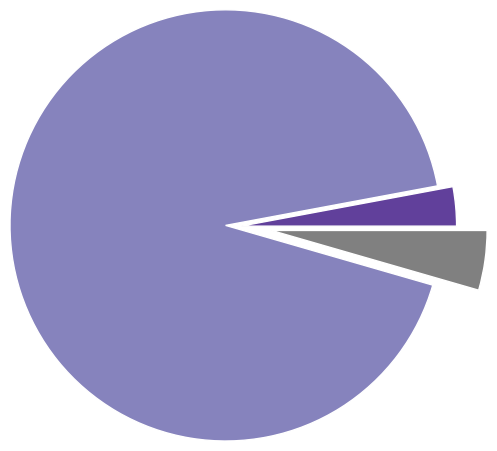

In [ ]:
fig, ax = plt.subplots(figsize=(5,5), nrows = 1, ncols = 1)
ax.axis('equal')
mypie2, _ = ax.pie([n_multiple_mapped,n_one_2_one_mapped,n_unmapped], radius=1.4, colors=[plt.cm.Purples(0.8),plt.cm.Purples(0.6),'grey'], explode = (0, 0.1, 0.2), startangle=0)
plt.savefig(f'figures/1e.pdf', bbox_inches='tight')
plt.setp(mypie2, edgecolor='white')
plt.show()

## Figure 1f 

Percentages of human mutations in the H2M Database that can be modeled in the mouse genome, stratified by the data source.  

In [11]:
name_list = ['AACR','COSMIC','CLINVAR']
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []

for x in [0,1,2]:
    name = name_list[x]
    df = df_binded[df_binded['Database']==name].reset_index(drop=True)
    l_1 = len(df['ID_human'].unique())
    for fs in [0]:
        df = df[df['flank_size'] >= fs] 
        list_of_n.append(name)
        list_of_fs.append(fs)
        df_sub = df[df['status']==True]
        l_2 = len(df_sub['ID_human'].unique())
        print(f'{name} with {fs}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
        list_of_output.append(l_2)
        list_of_input.append(l_1)
        list_of_class_0.append(len(df[df['class']==0]['ID_human'].unique()))
        list_of_class_1.append(len(df[df['class']==1]['ID_human'].unique()))
        list_of_class_2.append(len(df[df['class']==2]['ID_human'].unique()))
        list_of_class_3.append(len(df[df['class']==3]['ID_human'].unique()))

AACR with 0: 703261 out of 818409 (85.93%) mutations can be modeled.

COSMIC with 0: 436656 out of 527503 (82.78%) mutations can be modeled.

CLINVAR with 0: 1643037 out of 2038473 (80.60%) mutations can be modeled.



In [12]:
df = pd.DataFrame(zip(list_of_n, list_of_fs,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']

In [13]:
df

,Database,Flank_Size,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,AACR,0,818409,703261,569932,36846,97163,0
1,COSMIC,0,527503,436656,326165,21350,89546,0
2,CLINVAR,0,2038473,1643037,1278140,82406,284263,0


In [14]:
df_main = df

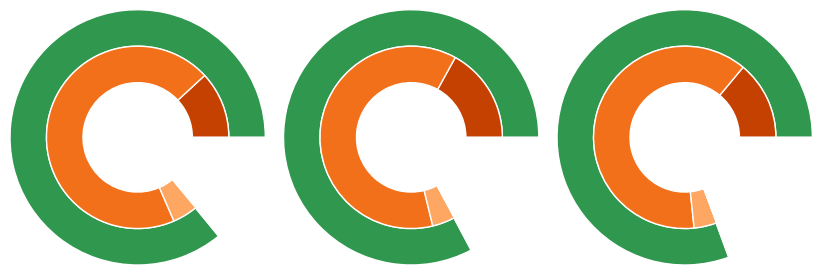

In [ ]:
fig, ax = plt.subplots(figsize=(10,3), nrows = 1, ncols = 3)
for i, x in df_main.iterrows():
    name = x[0]
    fs, input, output, n_0,n_1,n_2,n_3 = [int(t) for t in x[1:]] #x[1:]
    ax[i].axis('equal')
    mypie2, _ = ax[i].pie([output+n_3, input-output-n_3], radius=1.4, colors=[plt.cm.Greens(0.7),'white'], startangle=0)
    plt.setp(mypie2, width=0.4, edgecolor='white')

    mypie3, _ = ax[i].pie([n_2,n_0,n_1,n_3,input-(n_0+n_1+n_2+n_3)], radius=1, colors=[plt.cm.Oranges(0.8), plt.cm.Oranges(0.6),plt.cm.Oranges(0.4),'grey','white'], startangle=0)
    plt.setp(mypie3, width=0.4, edgecolor='white')
    ax[i].margins(0,0)

plt.savefig(f'figures/1f.svg', bbox_inches='tight')
plt.show()

## Figure 1g 

Distribution of flank sizes for all the human variants in H2M Database, split by NCE (left) for non-coding mutations and PCE (right) for coding mutations.

In [17]:
d1 = df_binded[df_binded['status']==True].reset_index(drop=True)
dd1 = d1[d1['class']==1].drop_duplicates(subset='ID_mouse').reset_index(drop=True)
dd2 = d1[d1['class']!=1].drop_duplicates(subset='ID_mouse').reset_index(drop=True)

In [18]:
np.nanmedian(dd1['flank_size'])

14.0

In [19]:
np.nanmedian(dd2['flank_size'])

18.0

NCE

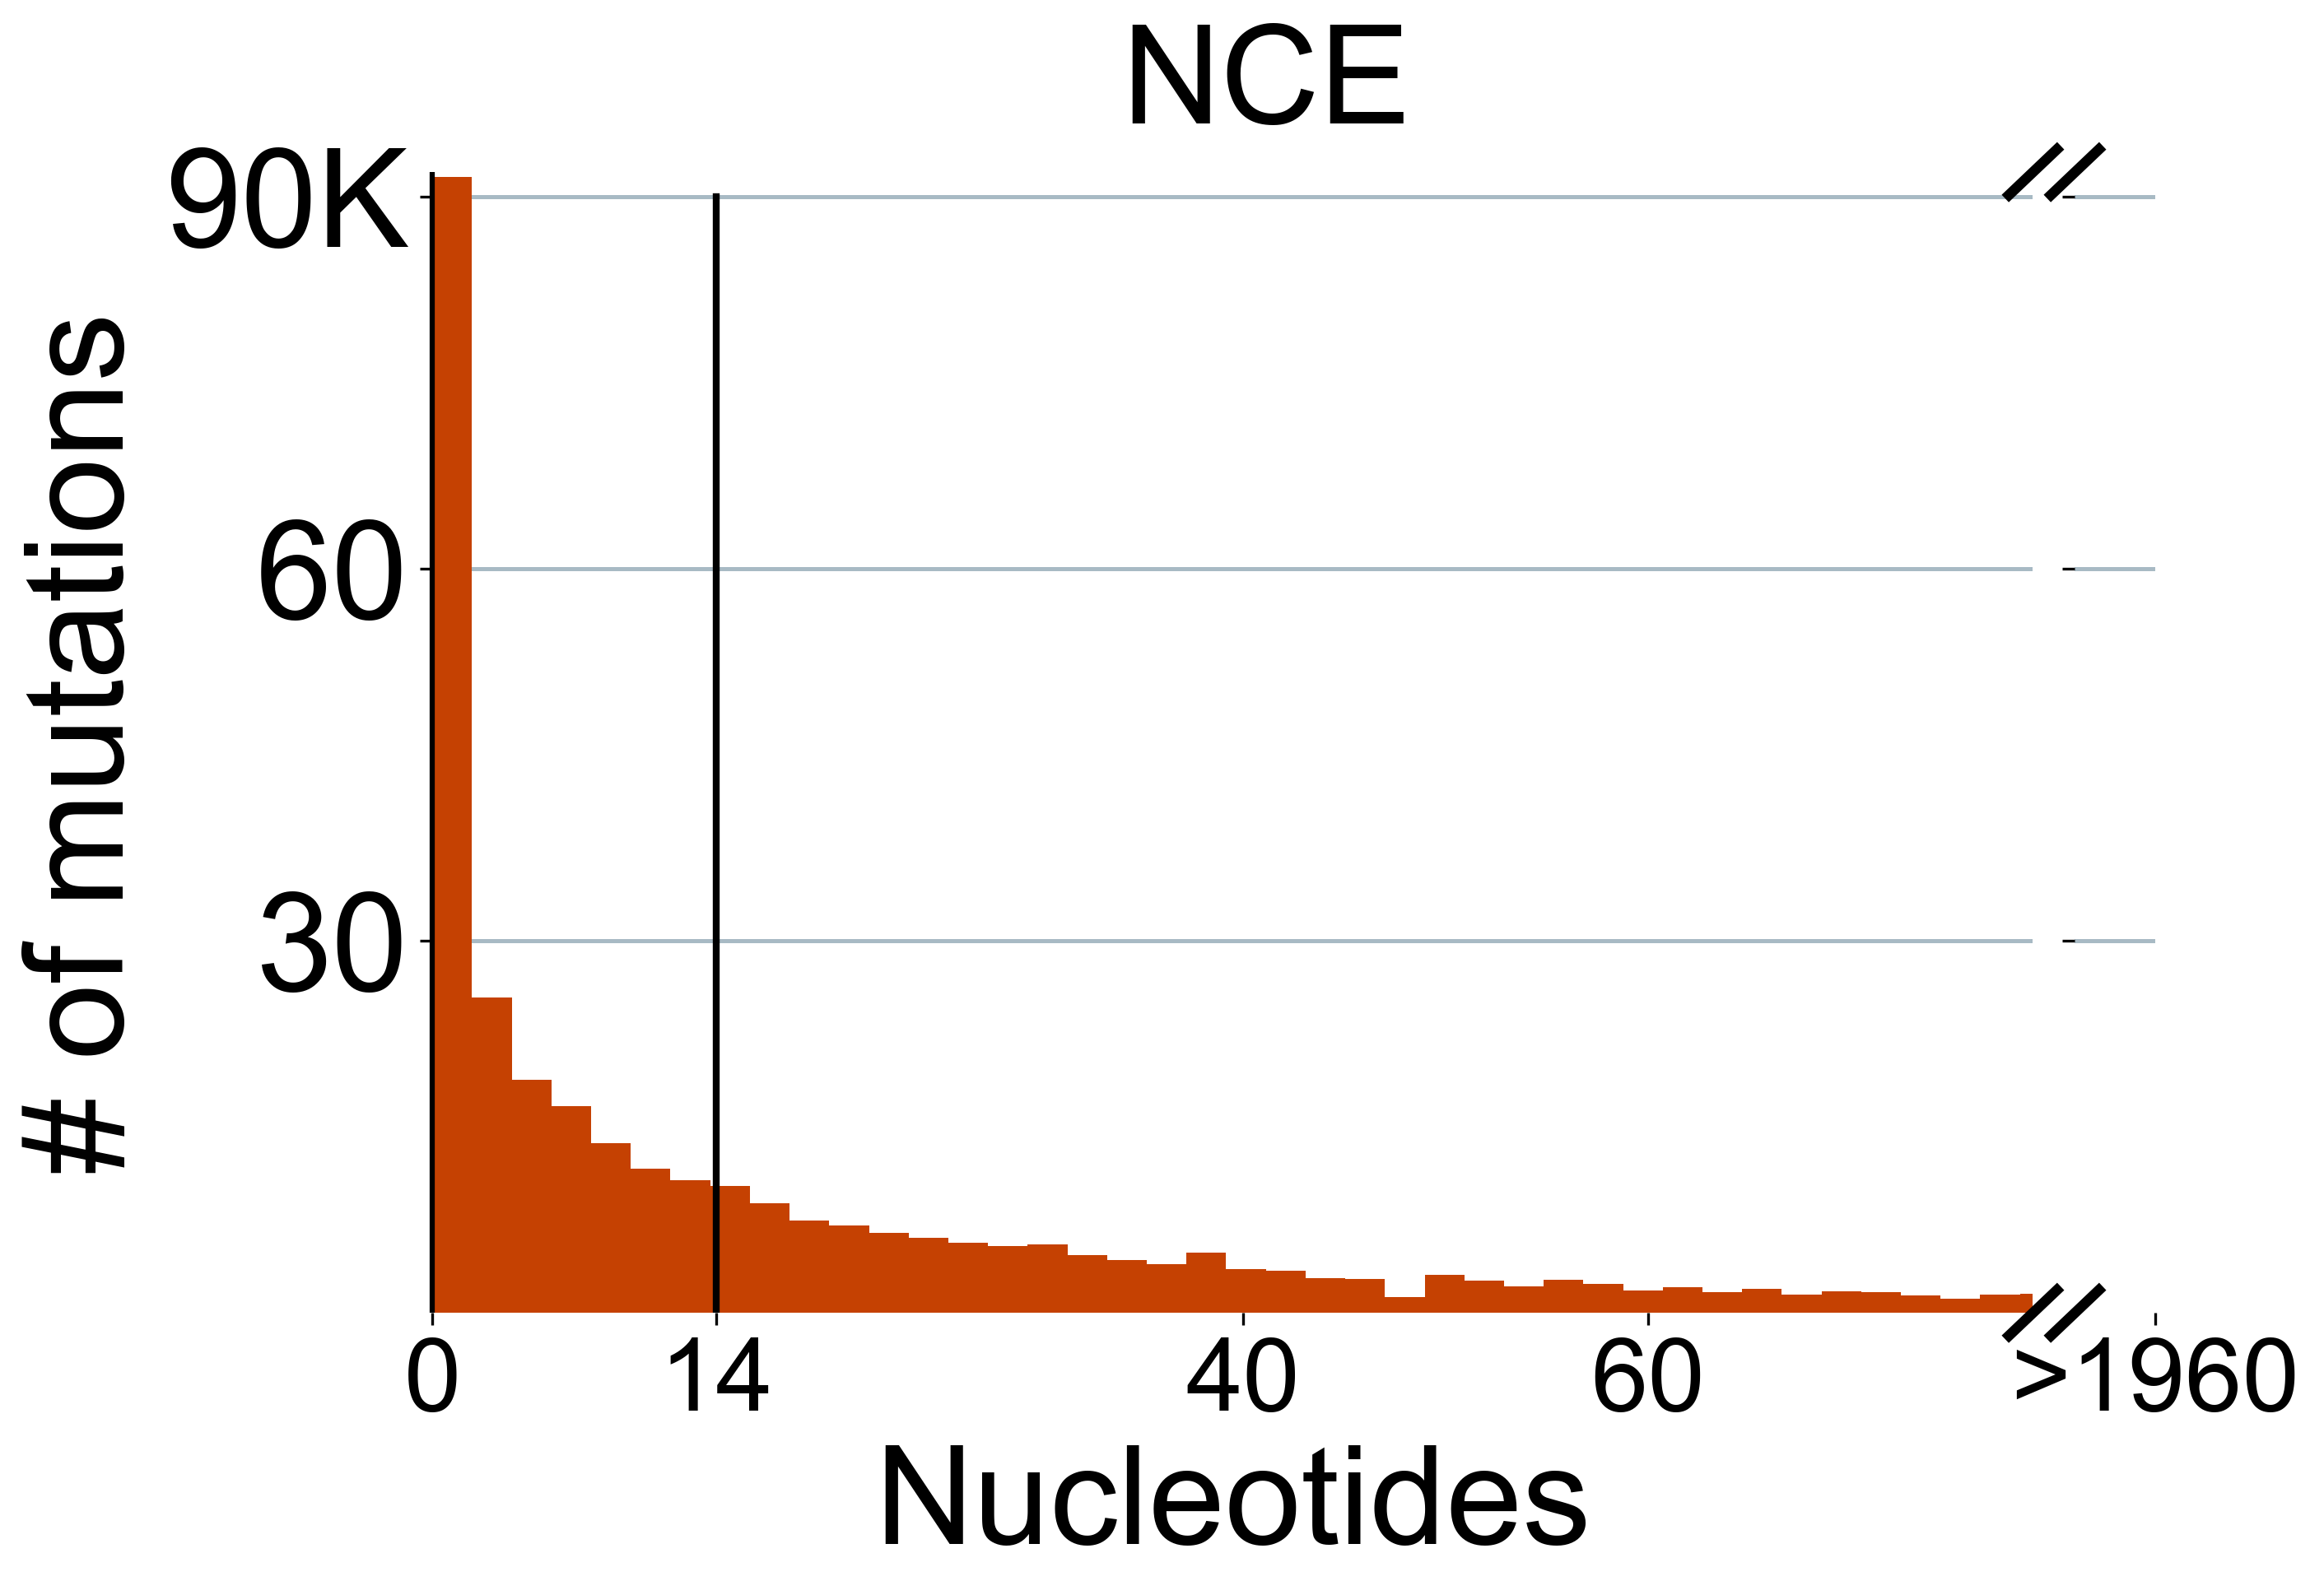

In [21]:
# NCE
fig, (ax,ax2) = plt.subplots(ncols= 2, nrows = 1, figsize=(9,6), dpi = 300, sharey=True, gridspec_kw={'width_ratios': [20, 1]})
fig.subplots_adjust(wspace=0.05)
# Assuming df_binded is your DataFrame
ax.hist(dd1['flank_size'], bins=1000, color = plt.cm.Oranges(0.8))
ax2.hist(dd1['flank_size'], bins=1000,color = plt.cm.Oranges(0.8))
# Set the x-axis limit to show only 0 to 750
ax.set_xlim(0, 79)
ax.set_ylim(0, 92000)
ax.yaxis.set_ticks([x*10000 for x in [3,6,9]])
ax.yaxis.set_ticklabels(['30', '60', '90K'], size=40, fontfamily="Arial", fontweight=100)
ax.xaxis.set_ticks([0,14,40,60])
ax.xaxis.set_ticklabels([0,14,40,60], size=30, fontfamily="Arial", fontweight=100)
# ax.yaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.set_axisbelow(True)
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")

ax2.set_xlim(1959, 1960)
ax2.yaxis.set_ticks([x*10000 for x in [3,6,9]])

ax2.xaxis.set_ticks([1960])
ax2.xaxis.set_ticklabels(['>1960'], size=30, fontfamily="Arial", fontweight=100)

# ax.yaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax2.set_axisbelow(True)
ax2.grid(axis = "y", color="#A8BAC4", lw=1.2)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)

ax.plot([14, 14], [0, 90000], linewidth=2, linestyle='-', color='black')

d = .015  # 斜线的大小
dd = .02
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-dd, +dd), **kwargs, linewidth=3)
ax.plot((1-d, 1+d), (1-dd, 1+dd), **kwargs, linewidth=3)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d*20, +d*20), (1-dd, 1+dd), **kwargs, linewidth=3)
ax2.plot((-d*20, +d*20), (-dd, +dd), **kwargs, linewidth=3)
ax.set_ylabel(f"# of mutations", fontsize=40)
ax.set_xlabel(f"Nucleotides", fontsize=40)
plt.yticks(fontsize = 40)
plt.suptitle('NCE',fontsize=40)
# Display the plot
plt.savefig(f'figures/1g_nce.pdf', bbox_inches='tight')
plt.show()

PCE

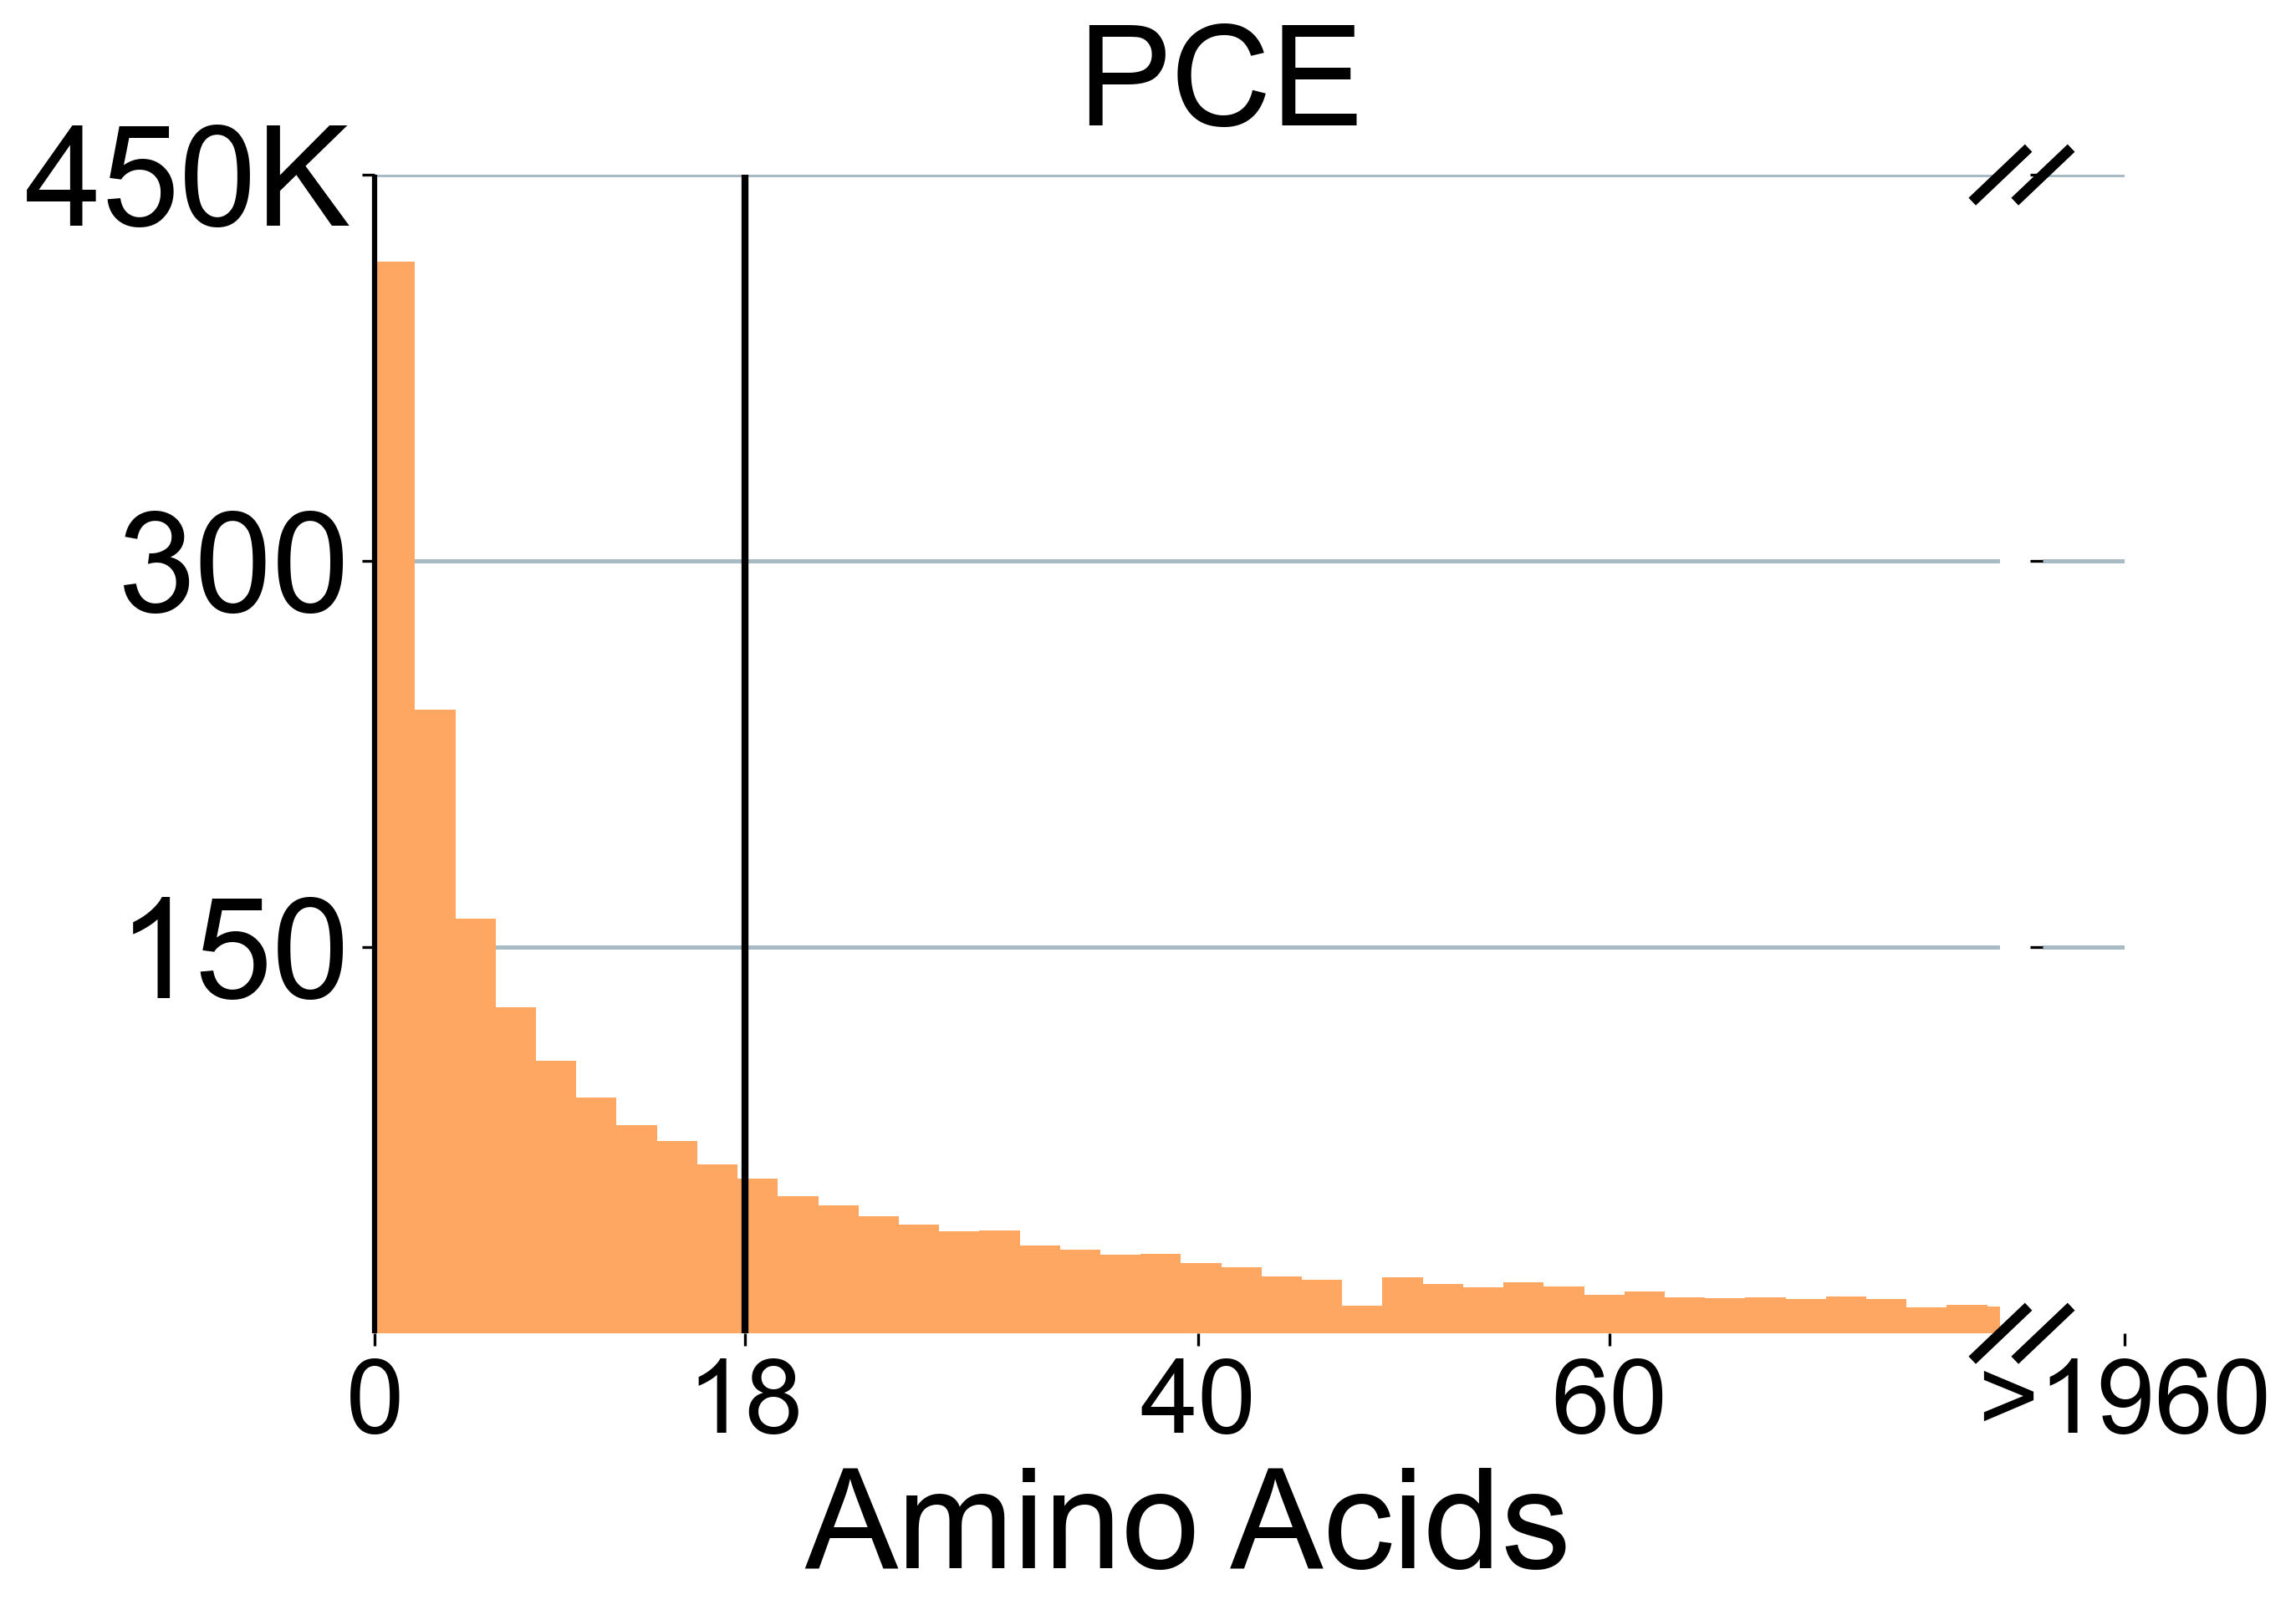

In [22]:
# PCE
fig, (ax,ax2) = plt.subplots(ncols= 2, nrows = 1, figsize=(9,6), dpi = 300, sharey=True, gridspec_kw={'width_ratios': [20, 1]})
fig.subplots_adjust(wspace=0.05)
# Assuming df_binded is your DataFrame
ax.hist(dd2['flank_size'], bins=1000, color = plt.cm.Oranges(0.4))
ax2.hist(dd2['flank_size'], bins=1000,color = plt.cm.Oranges(0.4))
# Set the x-axis limit to show only 0 to 750
ax.set_xlim(0, 79)
ax2.set_ylim(0, 450000)
ax.yaxis.set_ticks([x*150000 for x in [1,2,3]])
ax.yaxis.set_ticklabels(['150', '300', '450K'], size=40, fontfamily="Arial", fontweight=100)
ax.xaxis.set_ticks([0,18,40,60])
ax.xaxis.set_ticklabels([0,18,40,60], size=30, fontfamily="Arial", fontweight=100)
# ax.yaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.set_axisbelow(True)
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")

ax2.set_xlim(1959, 1960)
ax2.set_ylim(0, 450000)
ax2.yaxis.set_ticks([x*150000 for x in [1,2,3]])
ax2.xaxis.set_ticks([1960])
ax2.xaxis.set_ticklabels(['>1960'], size=30, fontfamily="Arial", fontweight=100)

# ax.yaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax2.set_axisbelow(True)
ax2.grid(axis = "y", color="#A8BAC4", lw=1.2)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)

ax.plot([18, 18], [0, 450000], linewidth=2, linestyle='-', color='black')

d = .015  # 斜线的大小
dd = .02
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-dd, +dd), **kwargs, linewidth=3)
ax.plot((1-d, 1+d), (1-dd, 1+dd), **kwargs, linewidth=3)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d*20, +d*20), (1-dd, 1+dd), **kwargs, linewidth=3)
ax2.plot((-d*20, +d*20), (-dd, +dd), **kwargs, linewidth=3)
ax.set_xlabel(f"Amino Acids", fontsize=40)
plt.yticks(fontsize = 40)
plt.suptitle('PCE',fontsize=40)
# Display the plot
plt.savefig(f'figures/1g_pce.pdf', bbox_inches='tight')
plt.show()

## Figure 1h 

Number of mutations that are prime-editing and base-editing amenable in the selected subset of the H2M Database.  

In [23]:
df_pe = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_result_all.csv')
df_be = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_result_all.csv')

In [24]:
pe_h = len(df_pe[[len(x.split('-'))==2 for x in df_pe['ID']]]['ID'].unique())
pe_m = len(df_pe[[len(x.split('-'))==4 for x in df_pe['ID']]]['ID'].unique())
be_h = len(df_be[[len(x.split('-'))==2 for x in df_be['ID']]]['ID'].unique())
be_m = len(df_be[[len(x.split('-'))==4 for x in df_be['ID']]]['ID'].unique())
len_pe = len(df_pe)
len_be = len(df_be)
pe = pe_h+pe_m
be = be_h+be_m
print(f'Prime Editing: {len_pe} target {pe_h} for human, {pe_m} for mouse, and {pe} in total;\nBase Editing: {len_be} target {be_h} for human, {be_m} for mouse, and {be} in total.')

Prime Editing: 48255 target 4944 for human, 4707 for mouse, and 9651 in total;
Base Editing: 24680 target 2720 for human, 1892 for mouse, and 4612 in total.


In [25]:
list_of_y_loc_h = [x*.6 for x in range(2)]
list_of_y_loc_m = [x-.3+.09 for x in list_of_y_loc_h]

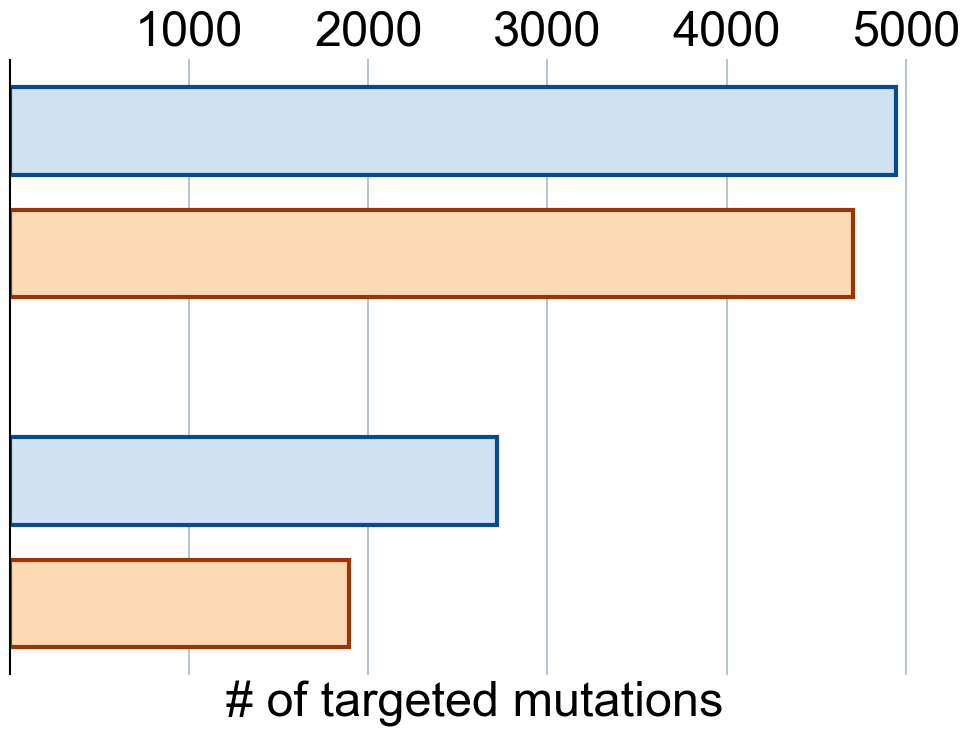

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
x_h = [pe_h, be_h]

x = [pe_m,be_m]

ax.barh(list_of_y_loc_h[::-1], x_h, height = 0.15, color = plt.cm.Blues(0.2) , edgecolor = plt.cm.Blues(0.9), linewidth = 3)

ax.barh(list_of_y_loc_m[::-1], x, height = 0.15, color = plt.cm.Oranges(0.2) , edgecolor = plt.cm.Oranges(0.9), linewidth = 3)

ax.xaxis.set_ticks([1000,2000,3000,4000,5000])
ax.xaxis.set_ticklabels([1000,2000,3000,4000,5000], size=35, fontfamily="Arial", fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
#ax.set_ylim((.15, 1.05))
ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
ax.set_xlabel(f"# of targeted mutations", fontsize=35)
ax.yaxis.set_visible(False)
plt.savefig(f'figures/1h.pdf', bbox_inches='tight')
plt.show()